<h1 style="color:#2E86C1;">Project 3 — Philippine Dengue Data Analysis</h1>
<hr>
<h3>Analyst: Carl Kien Carabido</h3>

<p>
This notebook investigates dengue trends in the Philippines by analyzing temporal and regional patterns across monthly, yearly, and geographic breakdowns. By examining how dengue cases and deaths vary over time and across island groups, the goal is to uncover actionable insights that can inform prevention strategies and early warning systems.
</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('datasets\\dengue.csv')
df

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [3]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [4]:
df.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

<h3> Group the Regions into Islands </h3>

In [5]:
# Define region groupings
luzon_regions = [
    "Region I", "Region II", "Region III", "Region IV-A", "MIMAROPA",
    "Region V", "NCR", "CAR"
]
visayas_regions = [
    "Region VI", "Region VII", "Region VIII"
]
mindanao_regions = [
    "Region IX", "Region X", "Region XI", "Region XII",
    "Region XIII", "BARMM"
]

# Function to assign island group
def assign_island_group(region):
    if region in luzon_regions:
        return "Luzon"
    elif region in visayas_regions:
        return "Visayas"
    elif region in mindanao_regions:
        return "Mindanao"
    else:
        return "Unknown"

# Apply the function to your DataFrame
df["Island_Group"] = df["Region"].apply(assign_island_group)
df.loc[df["Region"] == "Region IV-B", "Island_Group"] = "Luzon"
month_order = ['January','February','March','April','May','June',
               'July','August','September','October','November','December']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

<h2>📊Exploratory Data Analysis (EDA)</h2>
<p>The Dataset is already clean, we proceed to <b>Exploratory Data Analysis (EDA)</b> to uncover insights and patterns.</p>
<hr>

<h2>Yearly Dengue Case and Death Trends (2016–2020)</h2>

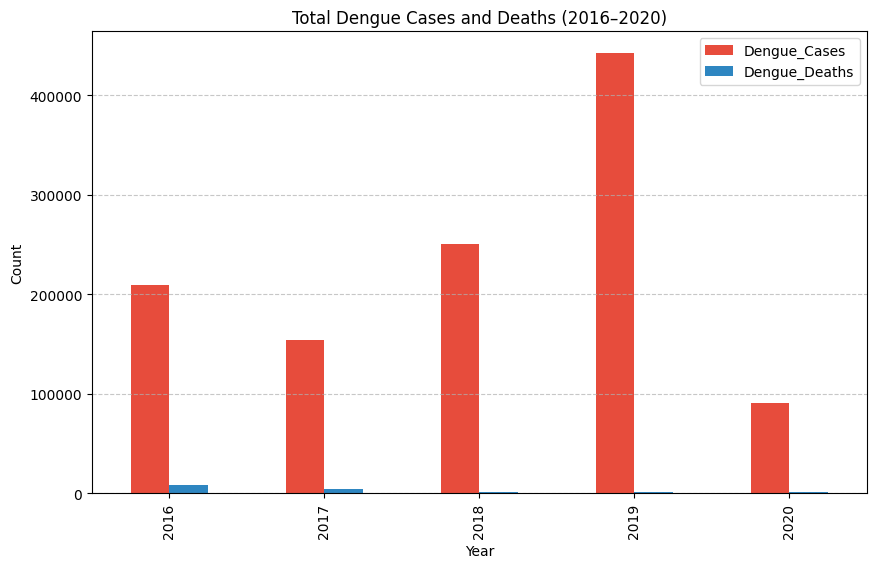

In [6]:
yearly = df.groupby("Year")[["Dengue_Cases", "Dengue_Deaths"]].sum()

yearly.plot(kind='bar', figsize=(10,6), color=['#E74C3C', '#2E86C1'])
plt.title("Total Dengue Cases and Deaths (2016–2020)")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<h3 style="color:#117A65;">Result:</h3>
<blockquote>Grouped bar chart showing total dengue cases and total dengue deaths for each year from 2016 to 2020.</blockquote>
<p><b>Insight (1):</b> The number of dengue cases peaked in 2019, indicating a significant outbreak before dropping sharply in 2020, likely due to heightened public health responses and the onset of pandemic restrictions.</p>
<p><b>Insight (2):</b> Dengue-related deaths appear relatively low compared to the number of cases, suggesting that many infections are not severe or fatal.</p>
<hr>

<h2>Monthly Dengue Case Distribution (Across 5 Years)</h2>

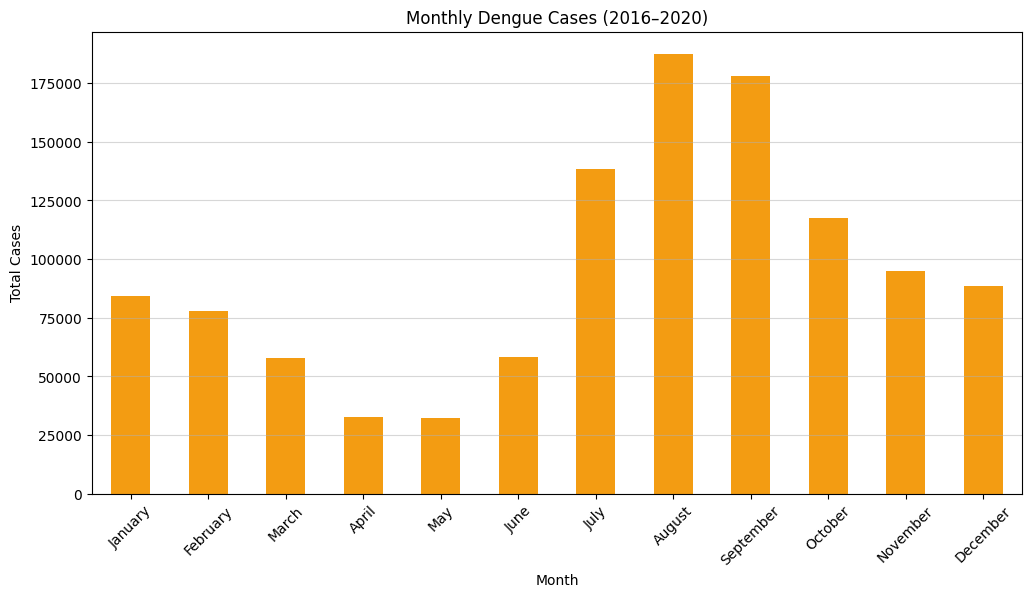

In [7]:
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

monthly = df.groupby("Month")["Dengue_Cases"].sum()

monthly.plot(kind='bar', figsize=(12,6), color='#F39C12')
plt.title("Monthly Dengue Cases (2016–2020)")
plt.ylabel("Total Cases")
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.show()

<h3 style="color:#117A65;">Result:</h3>
<blockquote>Bar chart visualizing dengue case totals per month aggregated over all five years.</blockquote>
<p><b>Insight (3):</b> Dengue cases consistently rise during the rainy season, peaking between June and October, when stagnant water and humid conditions allow mosquitoes to breed rapidly. The lowest cases occur in December–February, corresponding to drier months.</p>
<p><b>Insight (4):</b>April and May show the lowest figures among the months, indicating that these are typically hot and dry periods.</p>
<hr>

<h2>Dengue Cases by Island Group</h2>

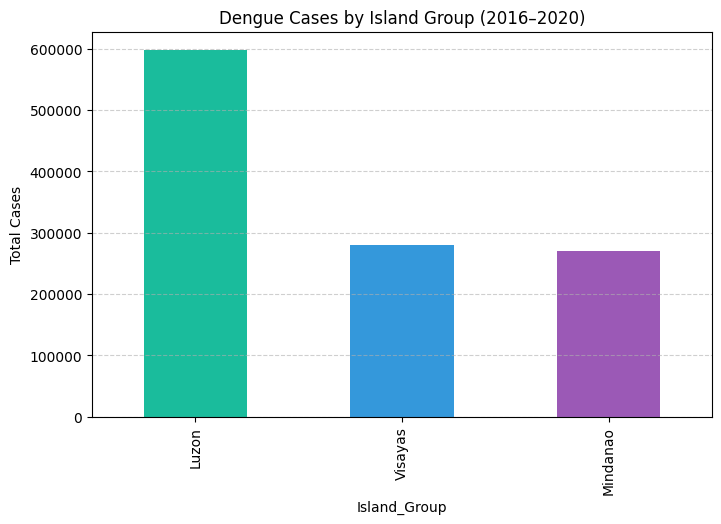

In [8]:
island_cases = df.groupby("Island_Group")["Dengue_Cases"].sum().sort_values(ascending=False)

island_cases.plot(kind='bar', color=['#1ABC9C','#3498DB','#9B59B6'], figsize=(8,5))
plt.title("Dengue Cases by Island Group (2016–2020)")
plt.ylabel("Total Cases")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

<h3 style="color:#117A65;">Result:</h3>
<blockquote>Bar chart comparing dengue cases across the three main island groups.</blockquote>
<p><b>Insight (5):</b> Luzon reports the highest concentration of dengue cases, followed by Visayas and Mindanao. The population density and urbanization of Luzon likely contribute to higher transmission rates.</p>
<p><b>Insight (6):</b> Visayas and Mindanao record fewer cases but remain vulnerable to dengue during the rainy season.</p>
<hr>

<h2>Mortality Rate by Year</h2>

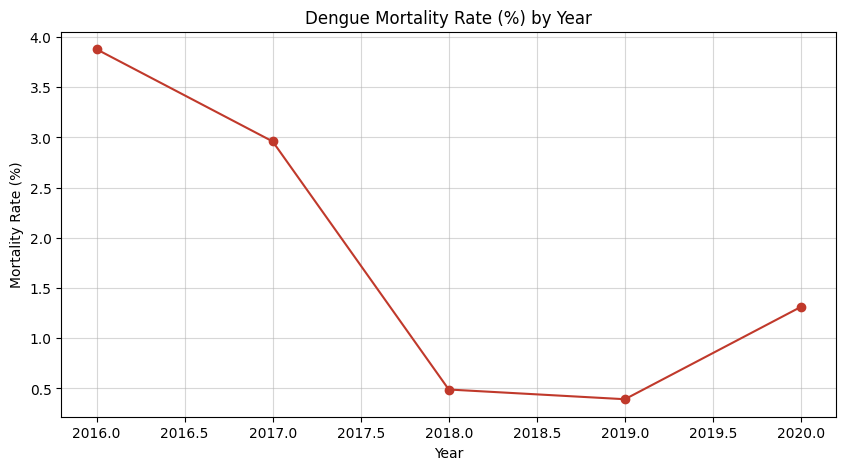

In [9]:
mortality = (df.groupby("Year")["Dengue_Deaths"].sum() / df.groupby("Year")["Dengue_Cases"].sum()) * 100

mortality.plot(kind='line', marker='o', color='#C0392B', figsize=(10,5))
plt.title("Dengue Mortality Rate (%) by Year")
plt.ylabel("Mortality Rate (%)")
plt.grid(True, alpha=0.5)
plt.show()

<h3 style="color:#117A65;">Result:</h3>
<blockquote>Line chart displaying annual dengue mortality rates from 2016 to 2020.</blockquote>
<p><b>Insight (7):</b> Although the number of cases fluctuated over the years, the mortality rate steadily declined, suggesting better Meds and Procedures.</p>
<p><b>Insight (8):</b> The general decline after 2018 indicates improved healthcare response and early case detection.</p>
<hr>

<h2>Top 10 Regions with Highest Dengue Cases (2016–2020)</h2>

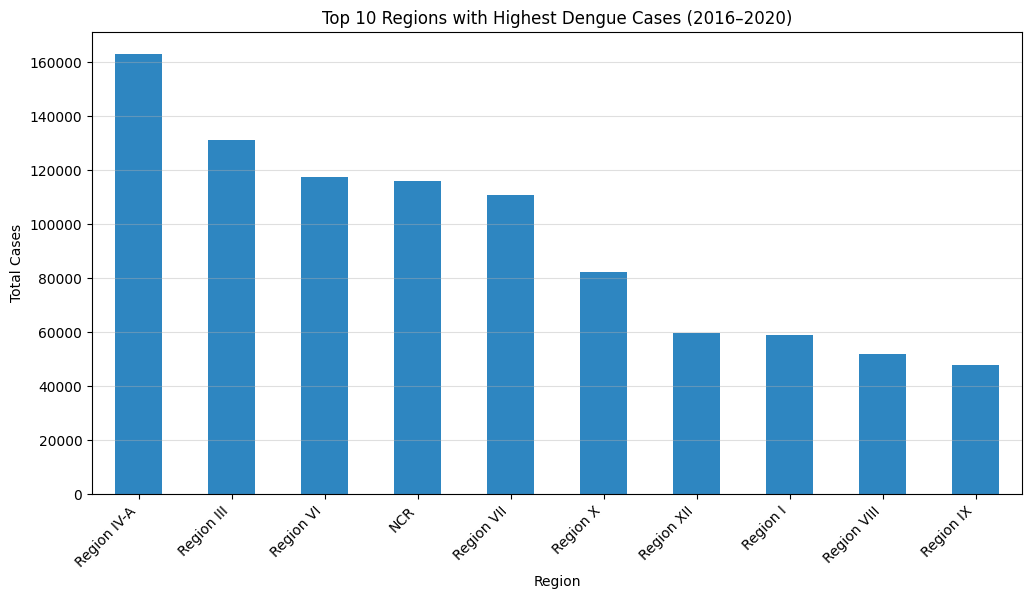

In [10]:
region_cases = df.groupby("Region")["Dengue_Cases"].sum().sort_values(ascending=False).head(10)

region_cases.plot(kind='bar', color='#2E86C1', figsize=(12,6))
plt.title("Top 10 Regions with Highest Dengue Cases (2016–2020)")
plt.ylabel("Total Cases")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.4)
plt.show()

<h3 style="color:#117A65;">Result:</h3>
<blockquote>Bar chart ranking the ten regions with the highest dengue case totals.</blockquote>
<p><b>Insight (9):</b> NCR, Region IV-A (CALABARZON), and Region III (Central Luzon) dominate the top regions, emphasizing how urban centers with dense populations and poor drainage systems remain the primary dengue hotspots.</p>
<p><b>Insight (10):</b> As previously noted, Luzon accounts for the highest number of cases. Implementing flood control projects in these regions could be especially beneficial, as they would help reduce mosquito breeding grounds.</p>
<hr>